In [39]:
''' Mehmet Muhammet ŞEN
    150255028
    İ.Ö '''

' Mehmet Muhammet ŞEN\n    150255028\n    İ.Ö '

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from  sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from numpy import loadtxt
from keras.layers import Dense
import seaborn as sbn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, accuracy_score
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, RocCurveDisplay, plot_roc_curve, confusion_matrix


In [41]:

data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/data1.xlsx")
data


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo
...,...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik


In [42]:

data.isnull().sum() #null değer yok. 
#Olsaydı aşağıdaki kodu yazacaktık.

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

In [43]:

##eksik verilerin ortalama değerler ile doldurulması 
#from sklearn.impute import SimpleImputer
#imputer= SimpleImputer(missing_values=np.nan, strategy="mean")
#Perimeter=data.iloc[:,0:3].values
#print(Perimeter)
#imputer=imputer.fit(Perimeter[:,0:3])
#Perimeter[:,0:3]=imputer.transform(Perimeter[:,0:3])

##perimeter sütununda boş değerler olsaydı sütun ortalaması ile doldurulacaktı 
#diğer sütunlar içinde aynı işlem yapılırdı ancak veri setinde boş değer yok.

In [44]:
le=LabelEncoder() #Class sütununu nümeriğe çevirdik.
data["Class"]=le.fit_transform(data["Class"])
data["Class"]

0       0
1       0
2       0
3       0
4       0
       ..
3805    1
3806    1
3807    1
3808    1
3809    1
Name: Class, Length: 3810, dtype: int64

In [45]:
X=data.drop(["Class"], axis=1) #girdi ve çıktıları ayırdık
y=data["Class"]


In [46]:
# girdi ve çıktıları ölçeklendirdik.

#StandartScaler
sc=StandardScaler()
X=pd.DataFrame(sc.fit_transform(X))
X

#minmaxScaler
#mms=MinMaxScaler(feature_range=(-3,3))
#rescaled_x=mms.fit_transform(x)
#np.set_printoptions(precision=4)
#print(rescaled_x[0:5,:])


#normalizer
#nl=Normalizer().fit(x)
#nl_x=nl.transform(x)
#np.set_printoptions(precision=4)
#print(rescaled_x[0:5,:])


,0,1,2,3,4,5,6
0,1.479830,2.004354,2.348547,-0.212943,2.018337,1.499659,-1.152921
1,1.147870,1.125853,0.988390,0.945568,0.410018,1.192918,-0.602079
2,1.135169,1.317214,1.451908,0.253887,1.212956,1.126504,0.405611
3,0.293436,0.115300,0.261439,0.198051,0.239751,0.233857,-0.275351
4,1.166345,1.487053,1.316442,0.523419,0.952221,1.299855,-0.206013
...,...,...,...,...,...,...,...
3805,-0.708215,-1.078353,-1.048323,-0.097251,-1.085282,-0.745465,0.247031
3806,-0.601988,-0.922926,-1.207208,0.549622,-1.970731,-0.590124,0.418815
3807,-0.133204,-0.329851,-0.298245,0.085220,-0.275099,-0.173068,-0.455731
3808,-1.608257,-1.740320,-1.580971,-1.414414,-0.598821,-1.607156,-0.037168


In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)
X.shape

(3810, 7)

In [48]:
from keras.engine import sequential
#model oluşturuldu, sigmoid kullanıldı.
model = Sequential()
model.add(Dense(12,  activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [49]:
input_shape = X.shape  
model.build(input_shape) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (3810, 12)                96        
                                                                 
 dense_4 (Dense)             (3810, 8)                 104       
                                                                 
 dense_5 (Dense)             (3810, 1)                 9         
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [50]:
# modeli derle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [51]:
# modeli eğit
model.fit(X,y, validation_split=0.10,  epochs=200,  batch_size = 10)

Epoch 1/200
343/343 [==============================] - 2s 4ms/step - loss: 0.3290 - accuracy: 0.8915 - val_loss: 0.2253 - val_accuracy: 0.8924
Epoch 2/200
343/343 [==============================] - 1s 2ms/step - loss: 0.1916 - accuracy: 0.9256 - val_loss: 0.2385 - val_accuracy: 0.8898
Epoch 3/200
343/343 [==============================] - 1s 2ms/step - loss: 0.1869 - accuracy: 0.9256 - val_loss: 0.2181 - val_accuracy: 0.9003
Epoch 4/200
343/343 [==============================] - 1s 2ms/step - loss: 0.1848 - accuracy: 0.9286 - val_loss: 0.2208 - val_accuracy: 0.8976
Epoch 5/200
343/343 [==============================] - 1s 2ms/step - loss: 0.1838 - accuracy: 0.9271 - val_loss: 0.2009 - val_accuracy: 0.9134
Epoch 6/200
343/343 [==============================] - 1s 2ms/step - loss: 0.1839 - accuracy: 0.9280 - val_loss: 0.2143 - val_accuracy: 0.9108
Epoch 7/200
343/343 [==============================] - 1s 2ms/step - loss: 0.1832 - accuracy: 0.9291 - val_loss: 0.2166 - val_accuracy: 0.9160

In [52]:

scores = model.evaluate(X_train,y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

96/96 [==============================] - 0s 1ms/step - loss: 0.1751 - accuracy: 0.9337
Training Accuracy: 93.37%

24/24 [==============================] - 0s 1ms/step - loss: 0.1742 - accuracy: 0.9213
Testing Accuracy: 92.13%



In [53]:
history= model.fit(X, y, validation_split=0.10,  epochs=200,  batch_size = 32)

Epoch 1/200
108/108 [==============================] - 0s 3ms/step - loss: 0.1725 - accuracy: 0.9329 - val_loss: 0.2053 - val_accuracy: 0.9186
Epoch 2/200
108/108 [==============================] - 0s 2ms/step - loss: 0.1723 - accuracy: 0.9318 - val_loss: 0.2095 - val_accuracy: 0.9186
Epoch 3/200
108/108 [==============================] - 0s 2ms/step - loss: 0.1725 - accuracy: 0.9326 - val_loss: 0.2081 - val_accuracy: 0.9186
Epoch 4/200
108/108 [==============================] - 0s 2ms/step - loss: 0.1723 - accuracy: 0.9323 - val_loss: 0.2064 - val_accuracy: 0.9186
Epoch 5/200
108/108 [==============================] - 0s 2ms/step - loss: 0.1725 - accuracy: 0.9321 - val_loss: 0.2061 - val_accuracy: 0.9186
Epoch 6/200
108/108 [==============================] - 0s 2ms/step - loss: 0.1725 - accuracy: 0.9323 - val_loss: 0.2075 - val_accuracy: 0.9186
Epoch 7/200
108/108 [==============================] - 0s 2ms/step - loss: 0.1724 - accuracy: 0.9326 - val_loss: 0.2054 - val_accuracy: 0.9186

In [54]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


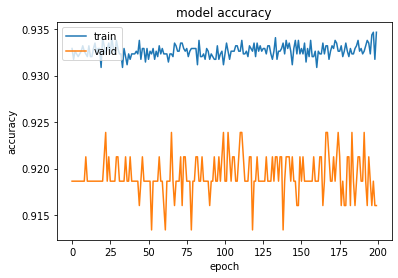

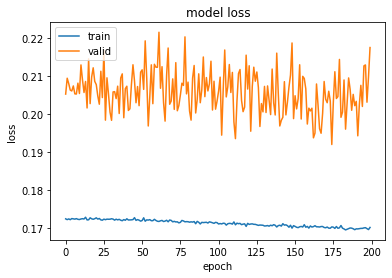

In [55]:
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [56]:
#accuracy skoru alındı

pred=model.predict(X_test)

score=accuracy_score(y_test, pred.round(), normalize=False)

print(score)

702


In [57]:
#TP TN FP FN Değerleri alındı.
confusion_matrix(y_test,pred.round())
tn,fp,fn,tp=confusion_matrix(y_test,pred.round()).ravel()
(tn,fp,fn,tp)

(309, 27, 33, 393)

In [58]:
#tablo oluşturuldu. Round() parametresini modelimizi LinearRegression() ile oluşturmadığımız için kullanmak zorunda kaldık.
from numpy.matrixlib.defmatrix import matrix
matrix=classification_report(y_test,pred.round())
print(matrix)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       336
           1       0.94      0.92      0.93       426

    accuracy                           0.92       762
   macro avg       0.92      0.92      0.92       762
weighted avg       0.92      0.92      0.92       762



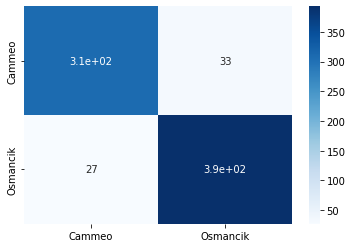

In [59]:
import seaborn as sns
cf_matrix = confusion_matrix(pred.round(), y_test)
sns.heatmap(cf_matrix, annot=True, cmap='Blues', xticklabels=['Cammeo', 'Osmancik'], yticklabels=['Cammeo', 'Osmancik'])

In [60]:
model.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy'])
history_Adamax= model.fit(X, y, validation_split=0.10,  epochs=200,  batch_size = 32)


Epoch 1/200
108/108 [==============================] - 1s 3ms/step - loss: 0.1698 - accuracy: 0.9321 - val_loss: 0.2086 - val_accuracy: 0.9160
Epoch 2/200
108/108 [==============================] - 0s 3ms/step - loss: 0.1689 - accuracy: 0.9321 - val_loss: 0.2082 - val_accuracy: 0.9160
Epoch 3/200
108/108 [==============================] - 0s 2ms/step - loss: 0.1688 - accuracy: 0.9323 - val_loss: 0.2067 - val_accuracy: 0.9160
Epoch 4/200
108/108 [==============================] - 0s 2ms/step - loss: 0.1688 - accuracy: 0.9326 - val_loss: 0.2063 - val_accuracy: 0.9160
Epoch 5/200
108/108 [==============================] - 0s 2ms/step - loss: 0.1687 - accuracy: 0.9318 - val_loss: 0.2049 - val_accuracy: 0.9186
Epoch 6/200
108/108 [==============================] - 0s 2ms/step - loss: 0.1688 - accuracy: 0.9326 - val_loss: 0.2065 - val_accuracy: 0.9160
Epoch 7/200
108/108 [==============================] - 0s 2ms/step - loss: 0.1687 - accuracy: 0.9329 - val_loss: 0.2033 - val_accuracy: 0.9186

In [38]:
model.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
history_Adadelta= model.fit(X, y, validation_split=0.10,  epochs=200,  batch_size = 10)


Epoch 1/200
343/343 [==============================] - 2s 4ms/step - loss: 0.6915 - accuracy: 0.5252 - val_loss: 0.6422 - val_accuracy: 1.0000
Epoch 2/200
343/343 [==============================] - 1s 3ms/step - loss: 0.6915 - accuracy: 0.5252 - val_loss: 0.6422 - val_accuracy: 1.0000
Epoch 3/200
343/343 [==============================] - 1s 4ms/step - loss: 0.6915 - accuracy: 0.5252 - val_loss: 0.6422 - val_accuracy: 1.0000
Epoch 4/200
343/343 [==============================] - 1s 3ms/step - loss: 0.6915 - accuracy: 0.5252 - val_loss: 0.6422 - val_accuracy: 1.0000
Epoch 5/200
343/343 [==============================] - 1s 3ms/step - loss: 0.6915 - accuracy: 0.5252 - val_loss: 0.6422 - val_accuracy: 1.0000
Epoch 6/200
343/343 [==============================] - 1s 4ms/step - loss: 0.6915 - accuracy: 0.5252 - val_loss: 0.6422 - val_accuracy: 1.0000
Epoch 7/200
343/343 [==============================] - 1s 4ms/step - loss: 0.6915 - accuracy: 0.5252 - val_loss: 0.6422 - val_accuracy: 1.0000

In [61]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_RMSprop= model.fit(X, y, validation_split=0.10,  epochs=200,  batch_size = 32)

Epoch 1/200
108/108 [==============================] - 1s 3ms/step - loss: 0.1696 - accuracy: 0.9326 - val_loss: 0.2046 - val_accuracy: 0.9160
Epoch 2/200
108/108 [==============================] - 0s 2ms/step - loss: 0.1696 - accuracy: 0.9326 - val_loss: 0.2078 - val_accuracy: 0.9160
Epoch 3/200
108/108 [==============================] - 0s 2ms/step - loss: 0.1698 - accuracy: 0.9323 - val_loss: 0.2064 - val_accuracy: 0.9186
Epoch 4/200
108/108 [==============================] - 0s 2ms/step - loss: 0.1698 - accuracy: 0.9329 - val_loss: 0.2006 - val_accuracy: 0.9213
Epoch 5/200
108/108 [==============================] - 0s 2ms/step - loss: 0.1700 - accuracy: 0.9326 - val_loss: 0.2024 - val_accuracy: 0.9160
Epoch 6/200
108/108 [==============================] - 0s 2ms/step - loss: 0.1697 - accuracy: 0.9329 - val_loss: 0.1979 - val_accuracy: 0.9213
Epoch 7/200
108/108 [==============================] - 0s 2ms/step - loss: 0.1695 - accuracy: 0.9329 - val_loss: 0.2100 - val_accuracy: 0.9186

In [62]:
model.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['accuracy'])
history_Adagrad= model.fit(X, y, validation_split=0.10,  epochs=200,  batch_size = 32)

Epoch 1/200
108/108 [==============================] - 1s 3ms/step - loss: 0.1692 - accuracy: 0.9326 - val_loss: 0.2041 - val_accuracy: 0.9213
Epoch 2/200
108/108 [==============================] - 0s 2ms/step - loss: 0.1687 - accuracy: 0.9332 - val_loss: 0.2054 - val_accuracy: 0.9213
Epoch 3/200
108/108 [==============================] - 0s 2ms/step - loss: 0.1685 - accuracy: 0.9329 - val_loss: 0.2062 - val_accuracy: 0.9213
Epoch 4/200
108/108 [==============================] - 0s 2ms/step - loss: 0.1684 - accuracy: 0.9332 - val_loss: 0.2068 - val_accuracy: 0.9213
Epoch 5/200
108/108 [==============================] - 0s 2ms/step - loss: 0.1683 - accuracy: 0.9332 - val_loss: 0.2074 - val_accuracy: 0.9213
Epoch 6/200
108/108 [==============================] - 0s 2ms/step - loss: 0.1682 - accuracy: 0.9329 - val_loss: 0.2079 - val_accuracy: 0.9213
Epoch 7/200
108/108 [==============================] - 0s 2ms/step - loss: 0.1682 - accuracy: 0.9332 - val_loss: 0.2078 - val_accuracy: 0.9213

In [63]:
model.compile(optimizer='ftrl', loss='binary_crossentropy', metrics=['accuracy'])
history_Ftrl= model.fit(X, y, validation_split=0.10,  epochs=200,  batch_size = 32)

Epoch 1/200
108/108 [==============================] - 1s 3ms/step - loss: 0.6897 - accuracy: 0.5276 - val_loss: 0.6907 - val_accuracy: 1.0000
Epoch 2/200
108/108 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5246 - val_loss: 0.6898 - val_accuracy: 1.0000
Epoch 3/200
108/108 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5246 - val_loss: 0.6889 - val_accuracy: 1.0000
Epoch 4/200
108/108 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5246 - val_loss: 0.6883 - val_accuracy: 1.0000
Epoch 5/200
108/108 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5246 - val_loss: 0.6877 - val_accuracy: 1.0000
Epoch 6/200
108/108 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5246 - val_loss: 0.6872 - val_accuracy: 1.0000
Epoch 7/200
108/108 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5246 - val_loss: 0.6867 - val_accuracy: 1.0000

In [64]:
model.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])
history_Nadam= model.fit(X, y, validation_split=0.10,  epochs=200,  batch_size = 32)

Epoch 1/200
108/108 [==============================] - 1s 3ms/step - loss: 0.4257 - accuracy: 0.9195 - val_loss: 0.1586 - val_accuracy: 0.9265
Epoch 2/200
108/108 [==============================] - 0s 2ms/step - loss: 0.3182 - accuracy: 0.9271 - val_loss: 0.1585 - val_accuracy: 0.9108
Epoch 3/200
108/108 [==============================] - 0s 2ms/step - loss: 0.2366 - accuracy: 0.9274 - val_loss: 0.1866 - val_accuracy: 0.8976
Epoch 4/200
108/108 [==============================] - 0s 2ms/step - loss: 0.2027 - accuracy: 0.9286 - val_loss: 0.1964 - val_accuracy: 0.9003
Epoch 5/200
108/108 [==============================] - 0s 2ms/step - loss: 0.1918 - accuracy: 0.9283 - val_loss: 0.1961 - val_accuracy: 0.9081
Epoch 6/200
108/108 [==============================] - 0s 2ms/step - loss: 0.1878 - accuracy: 0.9288 - val_loss: 0.2155 - val_accuracy: 0.9055
Epoch 7/200
108/108 [==============================] - 0s 2ms/step - loss: 0.1865 - accuracy: 0.9286 - val_loss: 0.2139 - val_accuracy: 0.9081

In [65]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history_SGD= model.fit(X, y, validation_split=0.10,  epochs=200,  batch_size = 32)

Epoch 1/200
108/108 [==============================] - 1s 3ms/step - loss: 0.1792 - accuracy: 0.9303 - val_loss: 0.2062 - val_accuracy: 0.9186
Epoch 2/200
108/108 [==============================] - 0s 2ms/step - loss: 0.1792 - accuracy: 0.9306 - val_loss: 0.2093 - val_accuracy: 0.9186
Epoch 3/200
108/108 [==============================] - 0s 2ms/step - loss: 0.1791 - accuracy: 0.9303 - val_loss: 0.2101 - val_accuracy: 0.9186
Epoch 4/200
108/108 [==============================] - 0s 2ms/step - loss: 0.1791 - accuracy: 0.9303 - val_loss: 0.2122 - val_accuracy: 0.9186
Epoch 5/200
108/108 [==============================] - 0s 2ms/step - loss: 0.1791 - accuracy: 0.9300 - val_loss: 0.2096 - val_accuracy: 0.9186
Epoch 6/200
108/108 [==============================] - 0s 2ms/step - loss: 0.1791 - accuracy: 0.9297 - val_loss: 0.2086 - val_accuracy: 0.9186
Epoch 7/200
108/108 [==============================] - 0s 2ms/step - loss: 0.1791 - accuracy: 0.9300 - val_loss: 0.2091 - val_accuracy: 0.9186

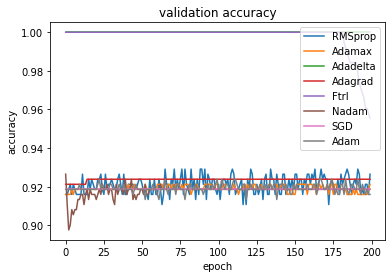

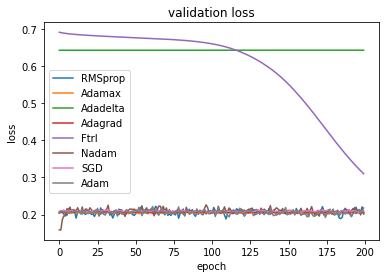

In [66]:
# summarize history for accuracy
## ADAM dışında tüm optimizerslar overfit oldu....
plt.plot(history_RMSprop.history['val_accuracy'])
plt.plot(history_Adamax.history['val_accuracy'])
plt.plot(history_Adadelta.history['val_accuracy'])
plt.plot(history_Adagrad.history['val_accuracy'])
plt.plot(history_Ftrl.history['val_accuracy'])
plt.plot(history_Nadam.history['val_accuracy'])
plt.plot(history_SGD.history['val_accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['RMSprop','Adamax','Adadelta','Adagrad','Ftrl','Nadam','SGD','Adam'], loc='lower ight')
plt.show()

# summarize history for loss
plt.plot(history_RMSprop.history['val_loss'])
plt.plot(history_Adamax.history['val_loss'])
plt.plot(history_Adadelta.history['val_loss'])
plt.plot(history_Adagrad.history['val_loss'])
plt.plot(history_Ftrl.history['val_loss'])
plt.plot(history_Nadam.history['val_loss'])
plt.plot(history_SGD.history['val_loss'])
plt.plot(history.history['val_loss'])
plt.title('validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['RMSprop','Adamax','Adadelta','Adagrad','Ftrl','Nadam','SGD','Adam'], loc='lower ight')
plt.show()